<a href="https://colab.research.google.com/github/joaoveasey/am-fatec-2025/blob/main/analise_joao_veasey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [1]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


***Referências:***

pandas [https://pandas.pydata.org/docs/getting_started/index.html#getting-started]

numpy [https://numpy.org/devdocs/]

seaborn [https://seaborn.pydata.org/tutorial.html]

matplotlib [https://matplotlib.org/stable/index.html]

plotly.express [https://plotly.com/python-api-reference/plotly.express.html]

# Carregamento do Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_credit = pd.read_csv('/content/drive/MyDrive/am5t2/credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


# Exercícios da Análise de Dados



## 1. Entenda a Estrutura dos Dados

#### Visualizando linhas da base de dados para verificar os tipos das variáveis:

In [ ]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


#### Identificando valores inconsistentes ou ausentes:

In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

## 2. Análise Estatística Geral

#### Calculando médias, medianas, desvios padrão e distribuições das principais variáveis númericas:

In [ ]:
base_credit.describe().round(3)

,clientid,income,age,loan,default
count,2000.000,2000.000,1997.000,2000.000,2000.000
mean,1000.500,45331.600,40.808,4444.370,0.142
std,577.495,14326.327,13.624,3045.410,0.349
min,1.000,20014.489,-52.423,1.378,0.000
25%,500.750,32796.460,28.990,1939.709,0.000
50%,1000.500,45789.117,41.317,3974.719,0.000
75%,1500.250,57791.282,52.587,6432.411,0.000
max,2000.000,69995.686,63.972,13766.051,1.000


#### Identificando a presença de outliers e distribuições assimétricas

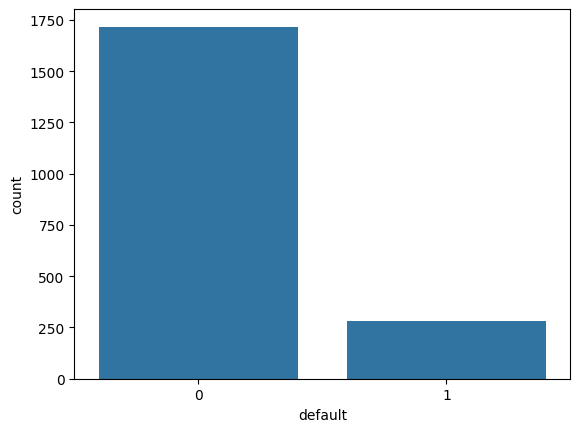

In [ ]:
sns.countplot(x = base_credit['default']);

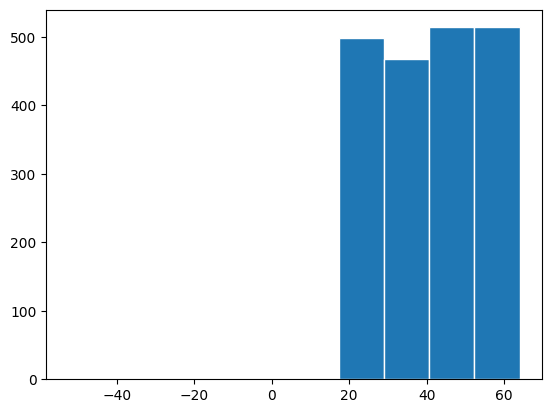

In [ ]:
plt.hist(x = base_credit['age'], edgecolor = 'white');

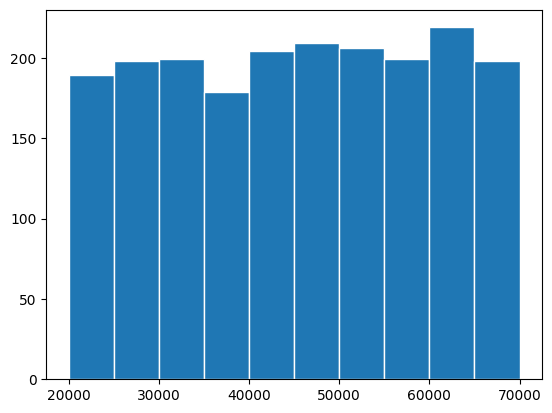

In [ ]:
plt.hist(x = base_credit['income'], edgecolor = 'white');

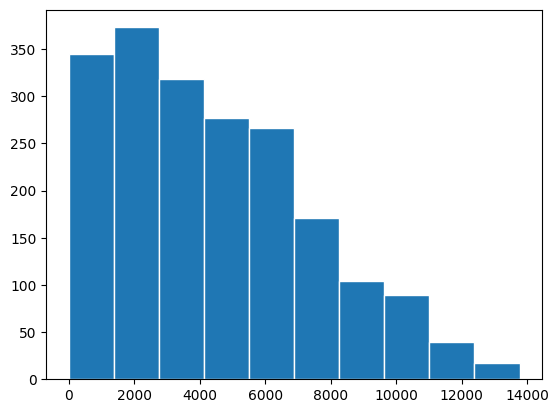

In [ ]:
plt.hist(x = base_credit['loan'], edgecolor = 'white');

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
graphic.show()

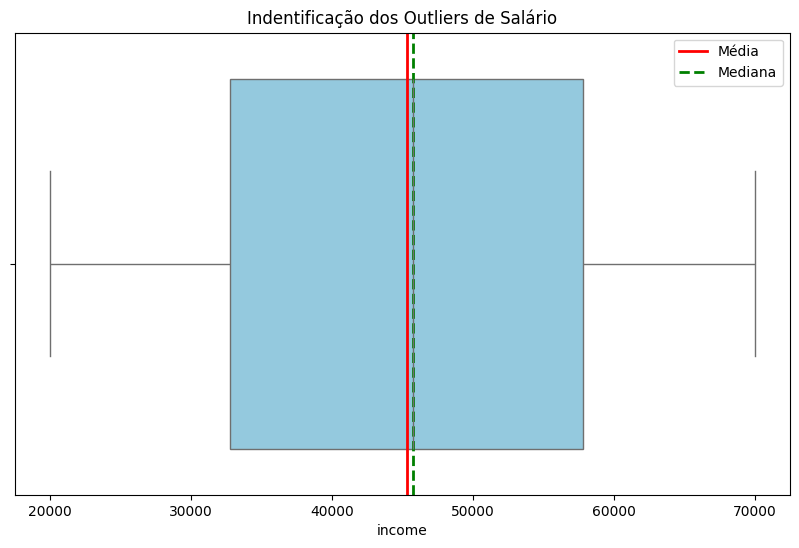

Média da Renda: R$ 45,331,60
Mediana da Renda: R$ 45,789,12
Desvio Padrão da Renda: R$ 14,326,33


In [ ]:
media_income = base_credit['income'].mean()
mediana_income = base_credit['income'].median()
desvio_padrao_income = base_credit['income'].std()

media_formatada = f"R$ {media_income:,.2f}".replace('.', ',').replace(',', '.', 1).replace('.', ',', 1)
mediana_formatada = f"R$ {mediana_income:,.2f}".replace('.', ',').replace(',', '.', 1).replace('.', ',', 1)
desvio_padrao_formatada = f"R$ {desvio_padrao_income:,.2f}".replace('.', ',').replace(',', '.', 1).replace('.', ',', 1)

plt.figure(figsize=(10,6))
sns.boxplot(x = base_credit['income'], color = 'skyblue')

plt.axvline(media_income, color = 'red', linewidth = 2, label = 'Média')
plt.axvline(mediana_income, color = 'green', linestyle = 'dashed', linewidth = 2, label = 'Mediana')

plt.title('Indentificação dos Outliers de Salário')
plt.legend()
plt.show()

print(f"Média da Renda: {media_formatada}")
print(f"Mediana da Renda: {mediana_formatada}")
print(f"Desvio Padrão da Renda: {desvio_padrao_formatada}")

In [ ]:
base_credit_anomalic_age = base_credit
base_credit_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit_anomalic_age = base_credit_anomalic_age.drop(base_credit_anomalic_age[base_credit_anomalic_age['age'] < 0].index)
base_credit_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
structured_age_mean = base_credit_anomalic_age['age'].mean()
structured_age_mean

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = structured_age_mean
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit['age'] = base_credit['age'].fillna(base_credit['age'].mean())
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [ ]:
base_credit['age'].mean()

40.92770044906149

## 3. Correlação Entre Variáveis

#### Utilizando um mapa de calor (heatmap) para visualizar as correlações entre os atributos

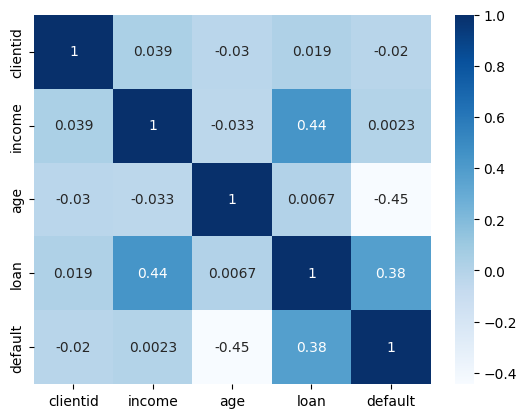

In [ ]:
sns.heatmap(base_credit.corr(), cmap = 'Blues', annot = True);

#### Identificando quais variáveis têm maior impacto no risco de crédito

Com base no Heatmap acima é possível visualizar a correlação entre os atributos, onde 'loan' e 'income' possuem maior nível de correlatividade.

## 4. Distribuição de Clientes Aprovados e Negados

#### Criando gráficos de barras para visualizar a proporção de clientes aprovados e negados

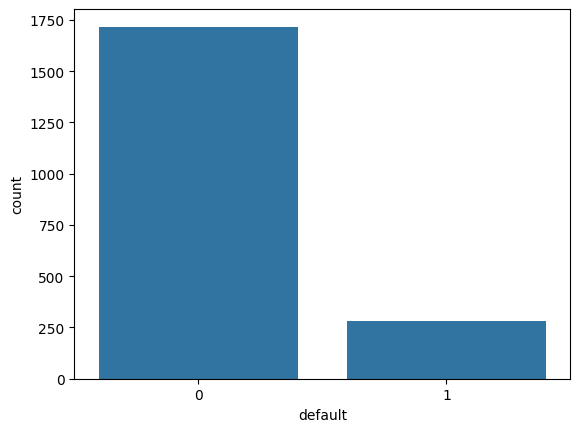

In [ ]:
sns.countplot(x = base_credit['default']);

#### Avaliando quais fatores mais influenciam a decisão final.

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['income', 'loan'], color = 'default')
graphic.show()

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'loan'], color = 'default')
graphic.show()

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income'], color = 'default')
graphic.show()

## 5. Relação entre Idade e Aprovação de Crédito

#### Analisando se existe uma faixa etária com maior dificuldade para obter crédito.

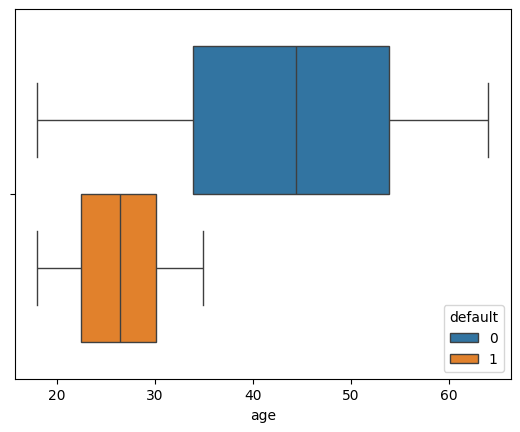

In [ ]:
sns.boxplot(data=base_credit, x='age', hue='default');

## 6. Impacto da Renda no Score de Crédito

#### Calculando o Score

In [ ]:
def calcular_score(income, age, loan, default):
    proporcao_emprestimo = loan / income
    score = (1000
              - (10000 * proporcao_emprestimo**1.5)
              + (age * 1)
              - (200 * default))
    return max(min(score, 1000), 0)

In [ ]:
base_credit['score'] = base_credit.apply(lambda row: calcular_score(row['income'], row['age'], row['loan'], row['default']), axis=1)


In [ ]:
base_credit.head(30)

,clientid,income,age,loan,default,score
0,1,66155.925095,59.017015,8106.532131,0,630.074057
1,2,34415.153966,48.117153,6564.745018,0,215.007401
2,3,57317.170063,63.108049,8020.953296,0,539.613853
3,4,42709.534201,45.751972,6103.642260,0,505.500008
4,5,66952.688845,18.584336,8770.099235,1,344.500960
5,6,24904.064140,57.471607,15.498598,0,1000.000000
6,7,48430.359613,26.809132,5722.581981,0,620.635718
7,8,24500.141984,32.897548,2971.003310,1,410.616295
8,9,40654.892537,55.496853,4755.825280,0,655.395877
9,10,25075.872771,39.776378,1409.230371,0,906.550404


In [ ]:
base_credit.describe()

,clientid,income,age,loan,default,score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927700,4444.369695,0.141500,659.728332
std,577.494589,14326.327119,13.251870,3045.410024,0.348624,300.729647
min,1.000000,20014.489470,18.055189,1.377630,0.000000,0.000000
25%,500.750000,32796.459717,29.102161,1939.708847,0.000000,401.656889
50%,1000.500000,45789.117313,41.300710,3974.719419,0.000000,728.461228
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000,935.796029
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000,1000.000000


#### Verificando se há uma relação direta entre renda e pontuação de crédito

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'score')
graphic.show()

<Axes: xlabel='income', ylabel='score'>

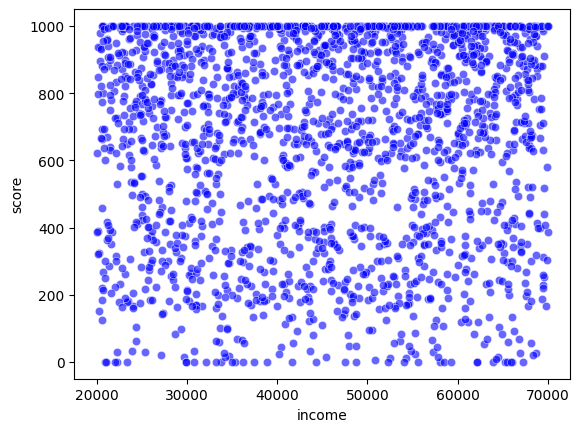

In [ ]:
sns.scatterplot(x='income', y='score', data=base_credit, color='blue', alpha=0.6)

## 8. Tempo de Histórico de Crédito e Aprovação

#### Existe um número mínimo de anos de histórico de crédito para aprovação?

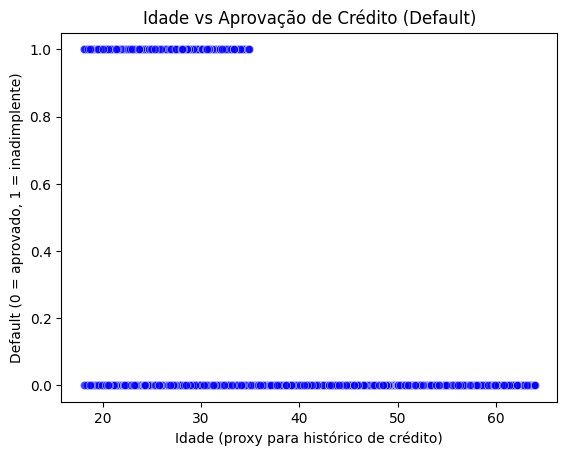

In [ ]:
sns.scatterplot(x='age', y='default', data=base_credit, color='blue', alpha=0.6)

plt.title('Idade vs Aprovação de Crédito (Default)')
plt.xlabel('Idade (proxy para histórico de crédito)')
plt.ylabel('Default (0 = aprovado, 1 = inadimplente)')
plt.show()

#### Gráfico com linha de tendência (Idade vs Default)

<Axes: xlabel='age', ylabel='default'>

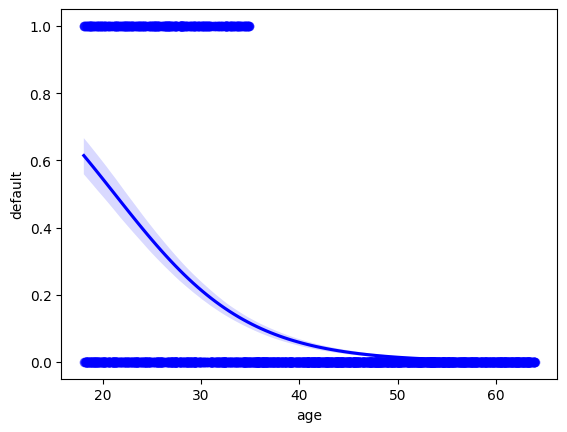

In [ ]:
sns.regplot(x='age', y='default', data=base_credit, logistic=True, color='blue', scatter_kws={'alpha':0.5})

In [ ]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
base_credit['age_group'] = pd.cut(base_credit['age'], bins=bins, labels=labels, right=False)

In [ ]:
default_rates = base_credit.groupby('age_group', observed=False)['default'].mean()

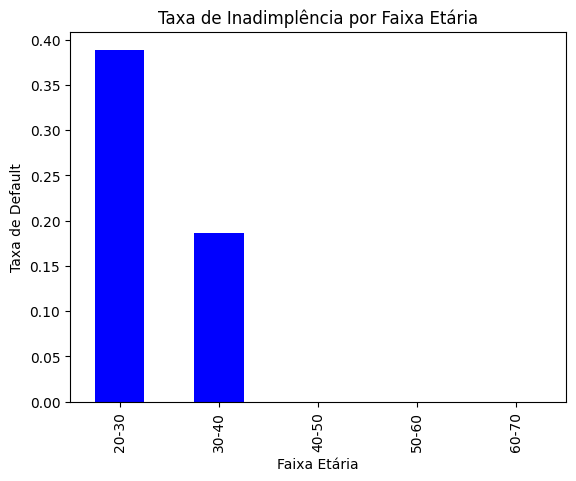

In [ ]:
default_rates.plot(kind='bar', color='blue')
plt.title('Taxa de Inadimplência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Default')
plt.show()

## 9. Endividamento e Score de Crédito

#### Pessoas com maior endividamento têm pontuações de crédito mais baixas?

In [ ]:
base_credit['debt_ratio'] = base_credit['loan'] / base_credit['income']

<Axes: xlabel='debt_ratio', ylabel='score'>

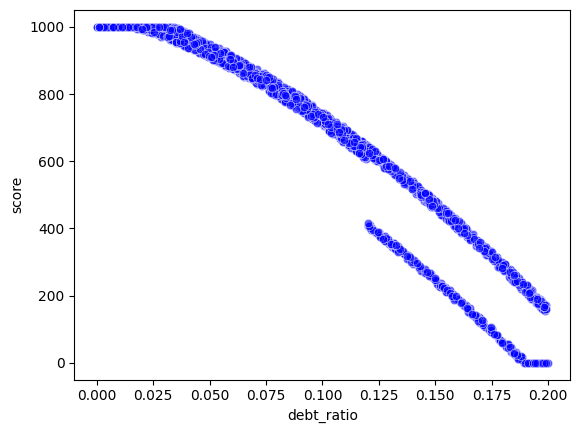

In [ ]:
sns.scatterplot(x='debt_ratio', y='score', data=base_credit, color='blue', alpha=0.6)

In [ ]:
base_credit['debt_bins'] = pd.qcut(base_credit['debt_ratio'], q=4, labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])

<Axes: xlabel='score', ylabel='Count'>

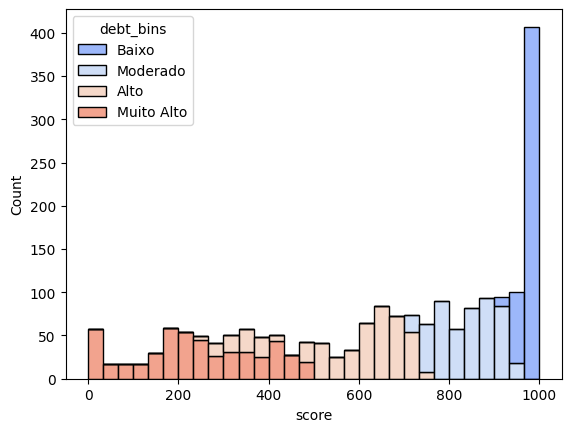

In [ ]:
sns.histplot(data=base_credit, x='score', hue='debt_bins', multiple='stack', bins=30, palette='coolwarm')

## 10.Conclusões e Recomendações para Modelagem

#### Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?

As variáveis mais relevantes para um modelo de aprendizado de máquina voltado à previsão de inadimplência são ***income***, ***age*** e ***loan***.

A variável ***income*** é crucial, pois reflete a capacidade de pagamento do cliente. A análise mostrou uma variação significativa, com uma média de 45.331,60 e um desvio padrão de 14.326,33. Já a variável ***age*** influencia o risco de inadimplência, com faixas etárias específicas, como 20 a 30 anos, apresentando maior propensão ao não pagamento. Além disso, ***loan***, nesse caso, é um fator determinante, pois empréstimos elevados aumentam o risco de inadimplência.

Por outro lado, ***clientid*** é apenas um identificador e não possui valor preditivo, podendo ser excluído do modelo, pois não agrega informações úteis nessa análise.

Dessa forma, as variáveis income, age e loan devem ser priorizadas, pois capturam os principais fatores de risco financeiro.

#### Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo?

Sim, é necessário. Alguns pontos a serem melhorados no modelo são:

* Corrigir valores negativos em age (substituir pela média ou remover).
* Preencher valores ausentes em age (23 registros) com a média.
* Criar loan_to_income (loan/income) e aplicar one-hot encoding em age_group.
* Aplicar log-transformação em income e loan.
* Remover clientid e tratar o desbalanceamento de default (média 0,14) usando SMOTE.

